In [1]:
# import library
import math
import pandas_datareader as web
import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [2]:
# updload data
data = web.DataReader(name='AAPL', data_source='yahoo', start='2012-01-01')

# show data
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.115936
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.390648
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.961189
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.504375
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.421093


In [3]:
# get the number of rows and columns in the data set
data.shape

(2033, 6)

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


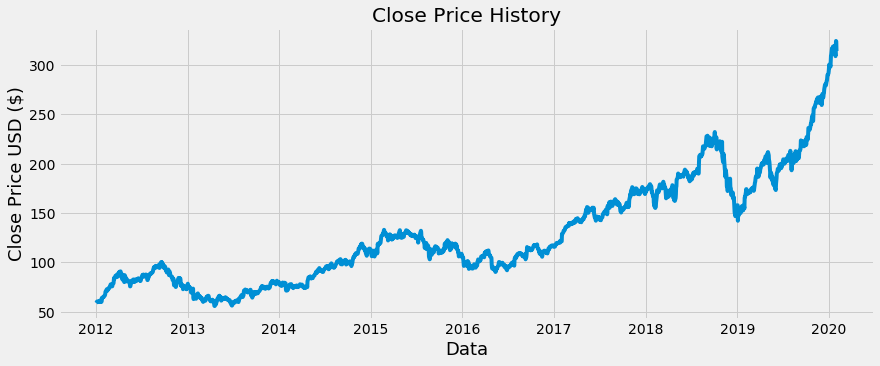

In [4]:
# vizualize the closing price history
plt.figure(figsize=(13,5))
plt.title('Close Price History')
plt.plot(data['Close'])
plt.xlabel('Data', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [5]:
# create a new dataframe with only the 'Close' column
x = data.filter(['Close'])

# convert the dataframe to a numpy array
dataset = x.values

# get the number of rows to train the model on
train_data_len = math.ceil(len(dataset) * 0.8) # use ceil to round up
print(train_data_len)

1627


In [6]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset) # we should use the range train_data_len

print(scaled_data)

[[0.01101151]
 [0.01218714]
 [0.01462882]
 ...
 [1.        ]
 [0.99824986]
 [0.96190649]]


In [7]:
# create the trainign data set
# create the scaled training data set
train_data = scaled_data[0: train_data_len]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i - 60:i, 0]) # zeroth's column / not including ith value.
  y_train.append(train_data[i, 0]) # use i as the next truth value at position 60.
  if i <= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.01101151, 0.01218714, 0.01462882, 0.01695348, 0.01659707,
       0.01740032, 0.01703327, 0.0164162 , 0.01557571, 0.01817698,
       0.02052292, 0.01979945, 0.01583637, 0.01961858, 0.01589488,
       0.02985876, 0.02877888, 0.03018858, 0.03323669, 0.03508257,
       0.03492831, 0.03435912, 0.03678485, 0.03906693, 0.04165226,
       0.04582813, 0.0546001 , 0.05473309, 0.05961647, 0.06326568,
       0.05699389, 0.05940899, 0.05936112, 0.06613295, 0.06517009,
       0.06695214, 0.07015452, 0.0719366 , 0.07706998, 0.08080965,
       0.0818895 , 0.0822672 , 0.07587309, 0.07433039, 0.07455914,
       0.08057024, 0.08226189, 0.08589514, 0.09445966, 0.10588611,
       0.10374764, 0.10375295, 0.11201426, 0.11459956, 0.11275899,
       0.11107802, 0.10932788, 0.11514215, 0.11913185, 0.1208022 ])]
[0.11667419757475875]



In [0]:
# convert the x_train and y_trian to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [9]:
# reshape the data, since LSTM expects 
# the input to be 3-dim [# samples, # time steps, # features]
print(x_train.shape)
# number of samples is the number of rows is 1566, number of time-steps 60, 
# and number of features is 1 is just the closing price
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # assume 1 features that is the closing price
print(x_train.shape)

(1567, 60)
(1567, 60, 1)


In [10]:
# build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, # True since we will use another LSTM layer
               input_shape=(x_train.shape[1], 1)) # this is the first layer give it the number of time-steps and number of features
              )
model.add(LSTM(units=50, return_sequences=False)) # False since we will not use another LSTM layer
model.add(Dense(units=25))
model.add(Dense(units=1))

In [11]:
# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/1





1567/1567 [==============================] - 292s 186ms/step - loss: 8.2876e-04


In [0]:
# create the testing data set
# create a new array containing scaled values from index 1566 to 2002 
test_data = scaled_data[train_data_len - 60: , :]

In [0]:
# create the data sets x_test and y_test
x_test = []
y_test = dataset[train_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [0]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [0]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

In [0]:
# get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions) # undo the scaling 

In [0]:
rmse = np.sqrt(np.mean(((predictions- y_test)**2)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


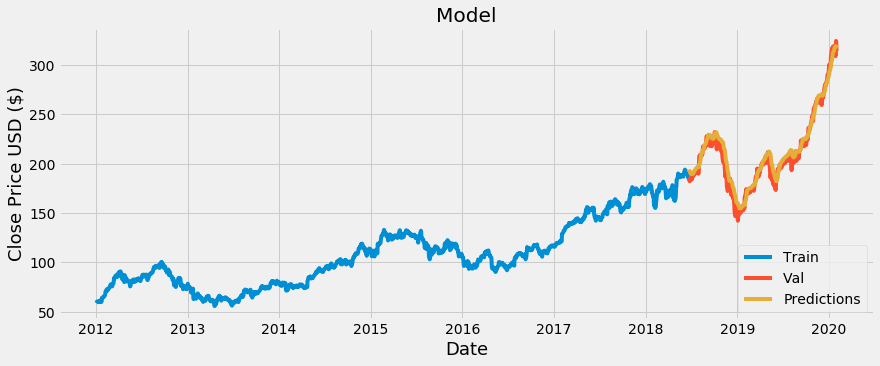

In [37]:
# create train and validation dataset
train = data[:train_data_len]
valid = data[train_data_len:]
valid['Predictions'] = predictions

# vizualize the closing price prediction data
plt.figure(figsize=(13,5))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [38]:
# show the valid and predicted prices
valid.head()

,High,Low,Open,Close,Volume,Adj Close,Predictions
Date,,,,,,,
2018-06-21,188.350006,184.940002,187.250000,185.460007,25711900.0,181.443069,194.111267
2018-06-22,186.149994,184.699997,186.119995,184.919998,27200400.0,180.914749,193.281006
2018-06-25,184.919998,180.729996,183.399994,182.169998,31663100.0,178.224304,192.457703
2018-06-26,186.529999,182.539993,182.990005,184.429993,24569200.0,180.435379,191.439331
2018-06-27,187.279999,184.029999,185.229996,184.160004,25285300.0,180.171219,190.650772


In [0]:
# get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2019-12-17')

In [0]:
# create a new dataframe
new_df = apple_quote.filter(['Close'])

In [0]:
# get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

In [0]:
# scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

In [0]:
# create an empty list
X_test = []

In [0]:
# append the past 60 days
X_test.append(last_60_days_scaled)

In [0]:
# convert the X_test data set to a numpy array
X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [0]:
# get the predicted scaled price
pred_price = model.predict(X_test)

In [47]:
# undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[277.108]]


In [48]:
# get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2019-12-18', end='2019-12-18')
apple_quote2['Close'].head()

Date
2019-12-18    279.73999
Name: Close, dtype: float64